### Importando as bibliotecas

In [1]:
# Imports
import math
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn import tree
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### Dicionário de Dados

* **gender**: Gênero do indivíduo       
* **age**: Idade do indivíduo
* **hypertension**: Se o indivíduo tem hipertensão (1) ou não tem hipertensão (0)
* **heart_disease**: Se o indivíduo tem doença cardíaca (1) ou não tem doença cardíaca (0)
* **smoking_history**: temos 5 categorias, ou seja, não atual, anterior, sem informações, atual, nunca e sempre.
* **bmi**: IMC onde
           < 18.5 é magreza
           18.5-24.9 é saudável, 
           25-29.9 é sobrepeso,
           30 ou mais é obeso.
* **HbA1c_level**: O nível Hemoglobina A1c é uma medida do nível médio de açúcar no sangue. Ideal é < 6.5%.
* **blood_glucose_level**: O nível de glicose no sangue refere-se à quantidade de glicose na corrente sanguínea.
* **diabetes**: Variável alvo, onde 1 indica diabete e 0 ausência de diabetes

### Carregando o dataset

In [2]:
dados = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
# Nosso dataset está composto por 100000 (cem mil) registros e 9 colunas
dados.shape

(100000, 9)

In [4]:
# Pegando uma amostra aleatória de 5 registros
dados.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
65595,Male,40.0,0,0,never,28.28,5.7,159,0
63408,Male,57.0,0,0,No Info,27.32,5.8,158,0
329,Male,61.0,0,0,No Info,27.32,6.2,130,0
35953,Female,46.0,0,0,never,27.32,4.0,85,0
47089,Male,10.0,0,1,No Info,29.48,6.0,158,0


### Análise Exploratória de Dados

In [5]:
# Tipos das variáveis

dados.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
# Alterando os tipos das variáveis.
# Podemos levar em consideração que os campos hypertension, heart_disease apesar de estar como numerico
# representam uma categoria 0 ou 1, logo é uma variável categórica

lista_colunas_categoricas = ['hypertension','heart_disease']

for lista_categoria in lista_colunas_categoricas:
    dados[lista_categoria] = dados[lista_categoria].astype(object)

In [7]:
dados.dtypes

gender                  object
age                    float64
hypertension            object
heart_disease           object
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

#### Separando nossas colunas em Numéricas , Categóricas e Target

In [8]:
# Variáveis categóricas
cats = ['gender', 'hypertension', 'heart_disease','smoking_history']

In [9]:
# Variáveis numéricas
nums = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [10]:
# Variável alvo

target = ['diabetes']

In [11]:
# Temos uma grande diferença na nossa variavel alvo
dados['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

#### Explorando as variáveis numéricas

In [12]:
# Resumo das variáveis numéricas

dados[nums].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


**Observações**:

* A variável **age** contém uma amplitude grande inclusive tendo como valor míninmo 0 (zero), normalmente a idade segue uma normalidade, porém iremos analisar melhor estes registros.


* O índice de **bmi** (IMC) indica que ter uma simetria, dado que a média e mediana não são tão discrepantes, mas indica uma amplitude grande ao compararmos a média com o valor máximo. Podemos entender que há pessoas com Magreza IMC <  18.5 e pessoas obesas tipo III com IMC > 40.


* A variável **HbA1c_level** mostra uma mediana de 5.8, onde metade tem acima de 5.8% de Hemoglobina A1c e a média não está tão distante. Uma pessoa em jejum considera-se um índice de Hemoglobina A1c < 6.5%.


* A variável **blood_glucose_level** mostra que o nível de glicose médio é 138 e mediana 140, valores bem próxios onde indica que se levarmos em consideração toda nossa base metade está em um nível já diabético. Temos um valor máximo de 300. Em jejum a normalidade varia de 70 à 100 mg/dl.

<Axes: >

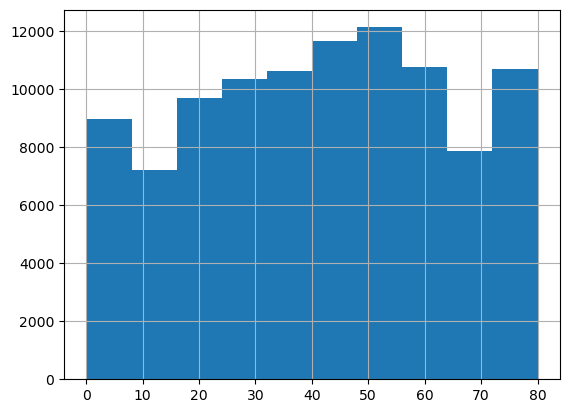

In [13]:
dados['age'].hist()

<Axes: >

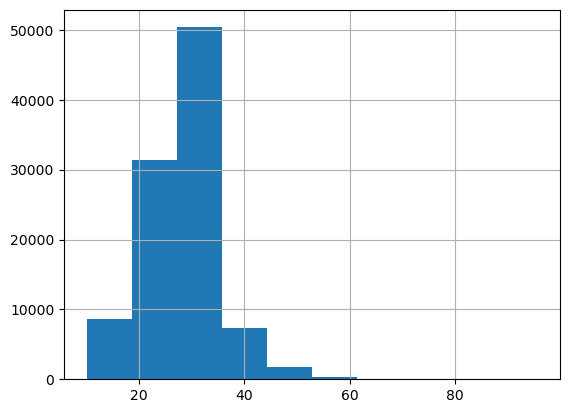

In [14]:
dados['bmi'].hist()

<Axes: >

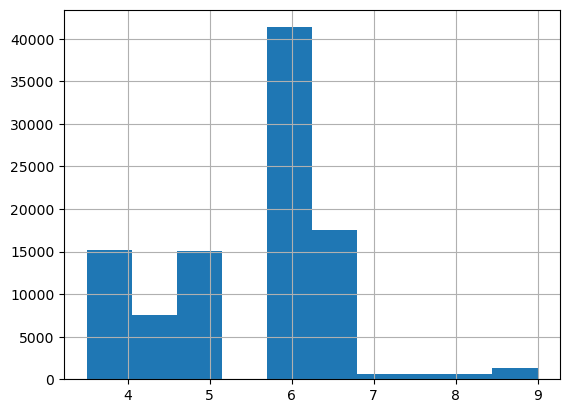

In [15]:
dados['HbA1c_level'].hist()

<Axes: >

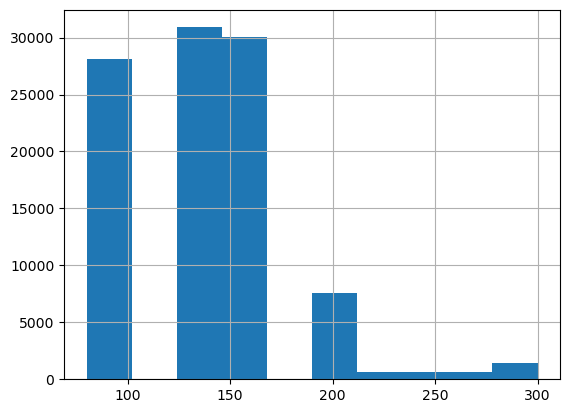

In [16]:
dados['blood_glucose_level'].hist()

#### Explorando as variáveis categóricas

In [17]:
# Resumo das variáveis categóricas

dados[cats].describe()

,gender,hypertension,heart_disease,smoking_history
count,100000,100000,100000,100000
unique,3,2,2,6
top,Female,0,0,No Info
freq,58552,92515,96058,35816


**Observações**:

* Para a variável **gender** Female é a classe dominante
* Para a variável **hypertension** 0 (Não possui hipertensão) é a classe dominante
* Para a variável **heart_disease** 0 (Não possui doença cardíaca) é a classe dominante
* Para a variável **smoking_history** No Info é a classe predominante
* Possuimos entre 2 - 6 valores únicos

In [18]:
# Listando o total por categoria

for var_categoria in cats:
    print(f'''Total de Registros Por Categoria da Variável {var_categoria}:''')
    print(dados[var_categoria].value_counts())
    print(50*'-')
    print('\n')

Total de Registros Por Categoria da Variável gender:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
--------------------------------------------------


Total de Registros Por Categoria da Variável hypertension:
hypertension
0    92515
1     7485
Name: count, dtype: int64
--------------------------------------------------


Total de Registros Por Categoria da Variável heart_disease:
heart_disease
0    96058
1     3942
Name: count, dtype: int64
--------------------------------------------------


Total de Registros Por Categoria da Variável smoking_history:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
--------------------------------------------------




### Análise Univariada - Boxplot ( Numéricas )

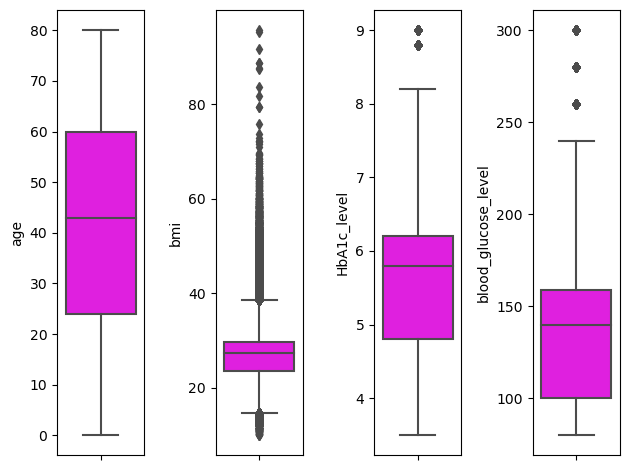

In [19]:
var_numericas_grafico = nums
for i in range(0, len(var_numericas_grafico)):
    plt.subplot(1, len(var_numericas_grafico), i + 1)
    sns.boxplot(y = dados[var_numericas_grafico[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

#### Análise Univariada - Dist Plots ( Numéricas )

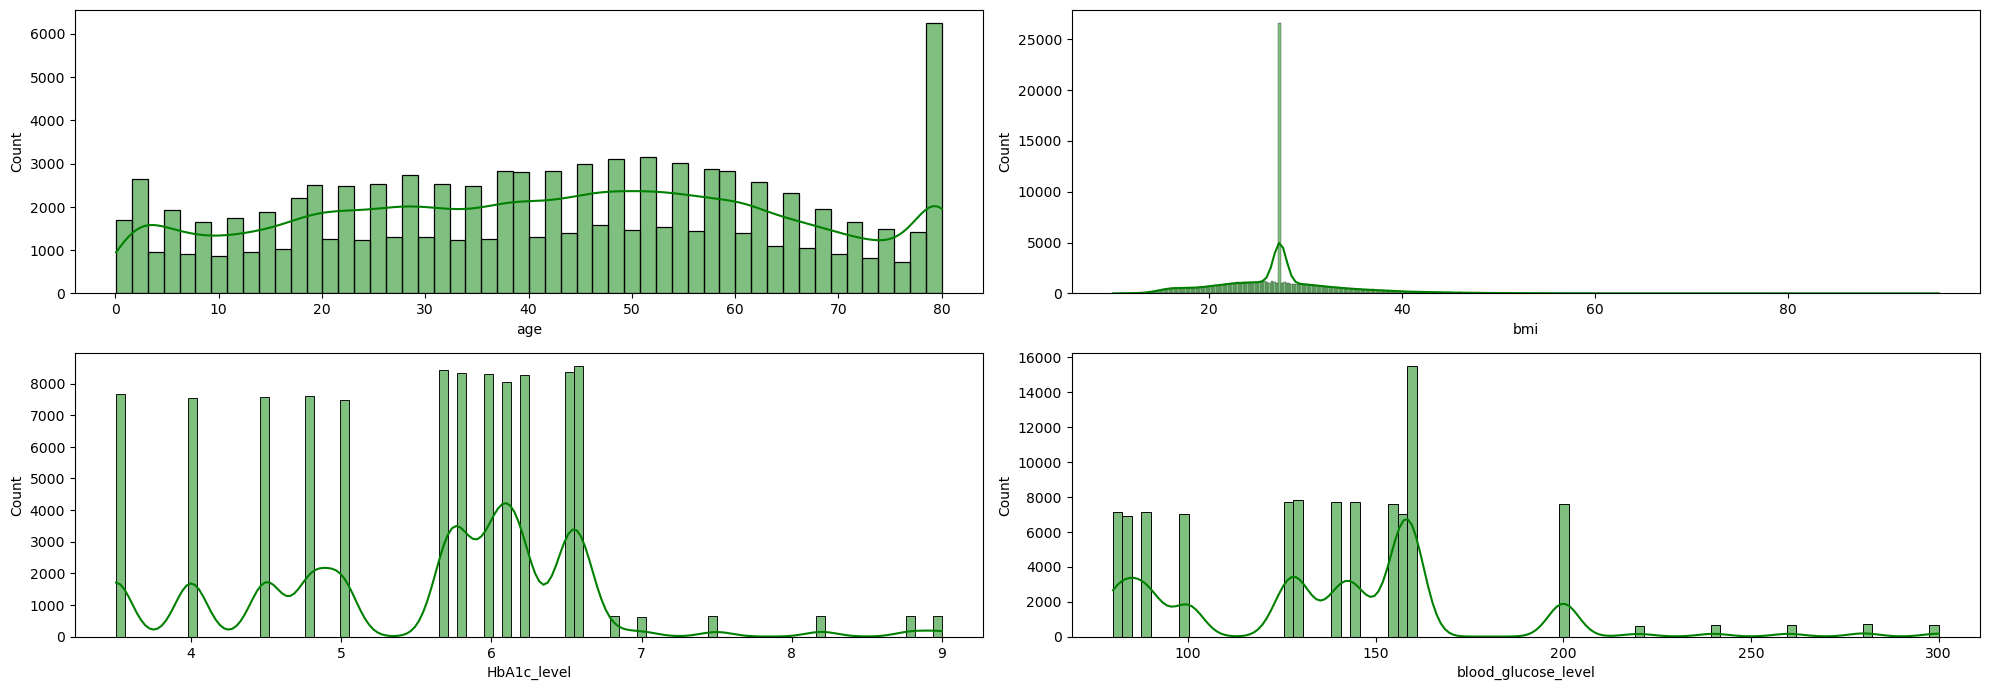

In [20]:
var_numericas_grafico = nums
plt.figure(figsize = (20, 10))
num_cols = math.ceil(len(nums) / 2) 
for i in range(0, len(nums)):
    plt.subplot(3, num_cols, i+1)
    sns.histplot(x = dados[var_numericas_grafico[i]], kde = True, color = 'green')
    plt.xlabel(var_numericas_grafico[i])
    plt.tight_layout()

### Análise Univariada - Count Plot (Categóricas)

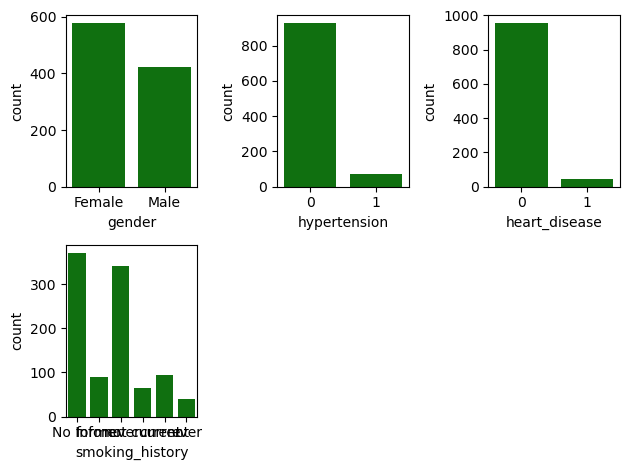

In [21]:
# Pegamos uma amostra de 1000 registros para fazermos os gráficos

df_sample = dados.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<Axes: xlabel='diabetes', ylabel='count'>

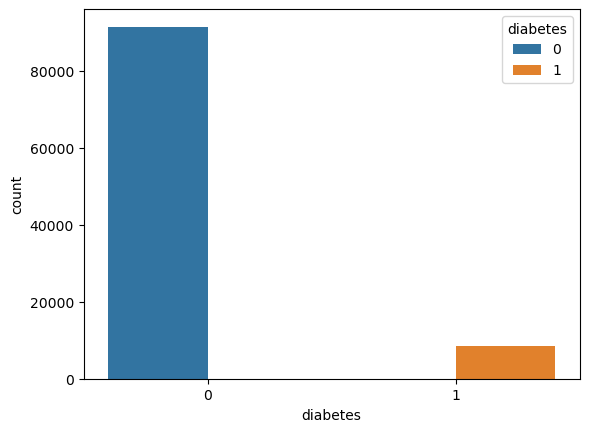

In [22]:
# Count Plot da variável target
sns.countplot(data = dados, x = dados['diabetes'], hue = 'diabetes')

<Axes: xlabel='smoking_history', ylabel='count'>

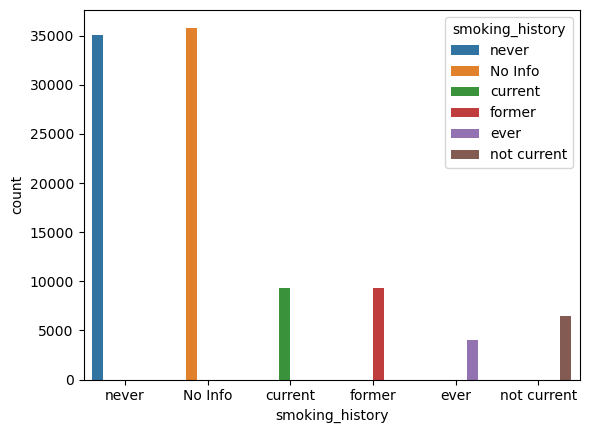

In [23]:
sns.countplot(data = dados, x = dados['smoking_history'], hue = 'smoking_history')

**Observações**:

* Temos mais registros do gênero Feminino do que Masculino
* Há grande discrepância em quantidades quando olhamos para as variáveis **hypertensions** e **heart_disease**
* Temos uma grande quantidade de registros Sem informações na variável **smoking_history** mas também uma grande quantidade que informa nunca terem fumado

#### Análise Bivariada - Mapa de Correlação

In [24]:
dados[nums].corr()

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.337396,0.101354,0.110672
bmi,0.337396,1.000000,0.082997,0.091261
HbA1c_level,0.101354,0.082997,1.000000,0.166733
blood_glucose_level,0.110672,0.091261,0.166733,1.000000


<Axes: >

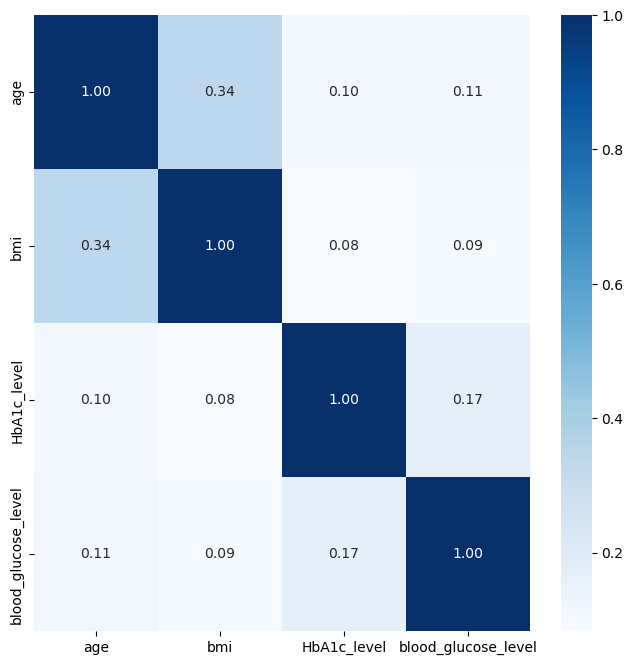

In [25]:
dados_corr = dados[nums].corr()

plt.figure(figsize = (8, 8))
sns.heatmap(dados_corr, cmap = 'Blues', annot = True, fmt = '.2f')

**Observações**:

* Há uma correlação positiva entre **bmi(IMC)** com a **age**
* Há uma correlação positiva entre **HbA1c_level** com a **blood_glucose_level**
* E há correlações fracas nas demais variáveis, onde algumas há quase ausência de correlação com valores póximos a 0

### Colunas Categóricas x Variável Target

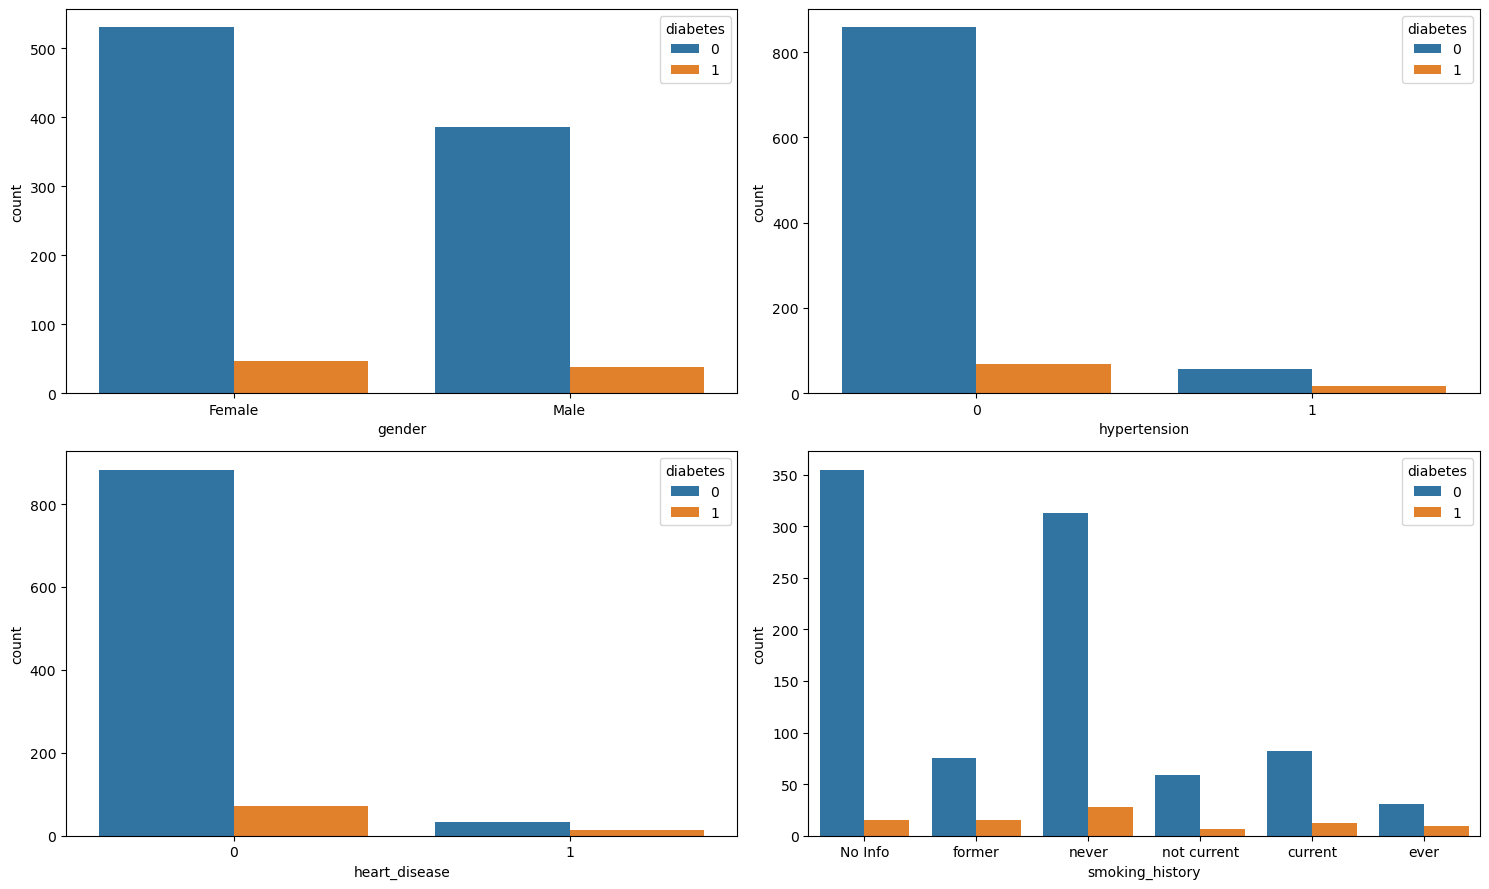

In [26]:
plt.figure(figsize = (15, 9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data = df_sample, x = features[i], hue = 'diabetes')
    plt.tight_layout()

### Limpeza e Tratmento dos dados

#### Verificando se há valores NaN

In [27]:
# Não encontramos valores nulos em nosso dataset
dados.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Verificando se há valores duplicados

Valores duplicados significam duplicidade dos dados em toda a linha (todo o registro)


In [28]:
dados.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [29]:
# Analisando a quantidade de registros duplicados
dados.duplicated().sum()

3854

In [30]:
dados[dados.duplicated(keep=False)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
41,Male,5.0,0,0,No Info,27.32,6.6,130,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [31]:
print(f'Quantidade de registros antes de remover dados duplicados {len(dados)}')

Quantidade de registros antes de remover dados duplicados 100000


In [32]:
# Removendo dados duplicados

dados_v2 = dados.drop_duplicates()
print(f'Quantidade de registros depois de remover dados duplicados {len(dados_v2)}')

Quantidade de registros depois de remover dados duplicados 96146


#### Verificando se há valores extremos ( Outliers )

Podemos perceber que na etapa de EDA, temos sim valores Outliers

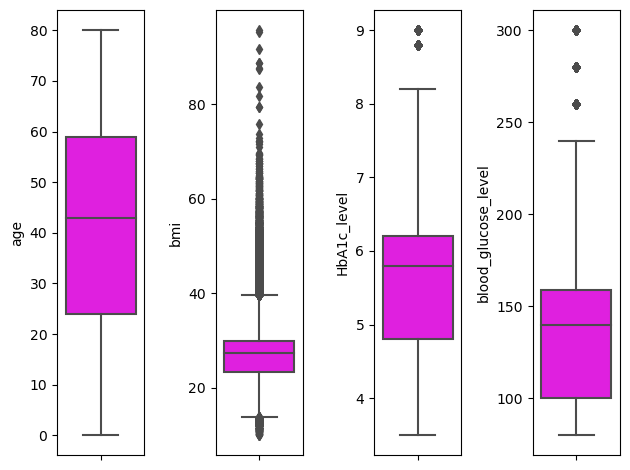

In [33]:
# Temos três variáveis/colunas com valores extremos

var_numericas_grafico = nums
for i in range(0, len(var_numericas_grafico)):
    plt.subplot(1, len(var_numericas_grafico), i + 1)
    sns.boxplot(y = dados_v2[var_numericas_grafico[i]], color = 'magenta')
    plt.tight_layout() # ajusta o gráfico

In [34]:
dados_v2[['bmi', 'HbA1c_level', 'blood_glucose_level']].describe()

,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000
mean,27.321461,5.532609,138.218231
std,6.767716,1.073232,40.909771
min,10.010000,3.500000,80.000000
25%,23.400000,4.800000,100.000000
50%,27.320000,5.800000,140.000000
75%,29.860000,6.200000,159.000000
max,95.690000,9.000000,300.000000


#### Tratando Outliers

Para identificarmos um valor Outlier devemos definir um limite superior e inferior. Aqui usaremos os limites baseados no desvio padrão.

* x barra é a média da coluna em questão
* Número 3 é o valor de "k"
* DP é o desvio padrão da coluna em questão

Um valor outlier é aquele que está abaixo do limite inferior ou acima do limite superior


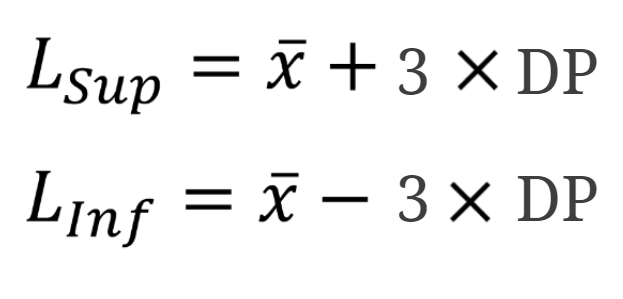



In [35]:
# Calculando Limite Superior da coluna
# o +3 signifca 3 desvio padrao acima
limite_superior_bmi = dados_v2.bmi.mean() + ( 3 * dados_v2.bmi.std() ) 

# Calculando Limite Inferior da coluna bmi
# o -3 signifca 3 desvio padrao abaixo
limite_inferior_bmi = dados_v2.bmi.mean() - ( 3 * dados_v2.bmi.std() )

print(f'Limite Superior bmi: {limite_superior_bmi}')
print(f'Limite Inferior bmi: {limite_inferior_bmi}')

Limite Superior bmi: 47.62460779267177
Limite Inferior bmi: 7.01831442978159


In [36]:
# Extraindo valores da coluna bmi de acordo com os limites superiores e inferiores
outlier_bmi = dados_v2[(dados_v2.bmi <= limite_inferior_bmi) | (dados_v2.bmi >= limite_superior_bmi)]
outlier_bmi.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
11,Female,54.0,0,0,former,54.70,6.0,100,0
39,Female,34.0,0,0,never,56.43,6.2,200,0
59,Female,67.0,0,0,never,63.48,8.8,155,1
93,Male,38.0,0,0,never,55.61,6.5,130,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0


In [37]:
# Filtra o dataframe removendo os registros com outliers na coluna bmi
dados_v3 = dados_v2[ (dados_v2.bmi > limite_inferior_bmi) & (dados_v2.bmi < limite_superior_bmi) ]

In [38]:
print(f'Quantidade de dados antes de remover outliers {len(dados_v2)}')
print(f'Quantidade de dados depois de remover outliers {len(dados_v3)}')

Quantidade de dados antes de remover outliers 96146
Quantidade de dados depois de remover outliers 94935


#### Como temos mais de uma coluna, iremos usar Z-Score e uma condição para aplicar o filtro de outlier em todas as colunas

Z-scores são o número de desvios padrão acima e abaixo da média. Por exemplo, um escore Z de 2 indica que uma observação está dois desvios padrão acima da média, enquanto um escore  Z  de -2  significa  que  está  dois  desvios  padrão  abaixo  da  média.  Um  Z-score  de  zerorepresenta um valor que é igual à média.

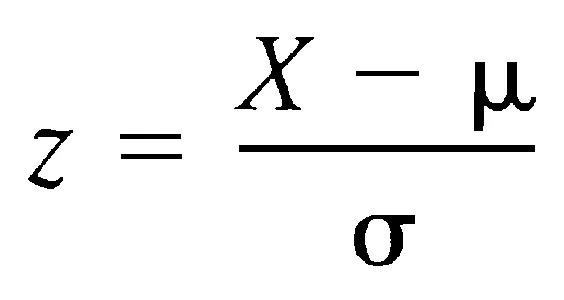


In [39]:
# Crio um array com valores True
# Quando encontrarmos valores outliers mudaremos para false

registros = np.array([True] * len(dados_v3))
registros

array([ True,  True,  True, ...,  True,  True,  True])

In [40]:
# conta quantos valores True temos
np.count_nonzero(registros == True)

94935

In [41]:
# conta quantos valores False temos
np.count_nonzero(registros == False)

0

In [42]:
# Variaveis numericas (sem a variavel bmi)
nums2 = ['HbA1c_level', 'blood_glucose_level']

In [43]:
# loop por cada variavel numérica
for col in nums2:
    
    # Calcula o z-score absoluto para cada coluna em nums2
    zscore = abs(stats.zscore(dados_v3[col]))
    
    # Mantém valores com menos de 3 z-score absoluto
    # A regra aqui é:
        # -> É menor que 3 ? Se sim, mantem o valor da variável registros que é True
        # -> senão
    registros = (zscore < 3) & registros

In [44]:
np.count_nonzero(registros == True)

92542

In [45]:
np.count_nonzero(registros == False)

2393

In [46]:
# Removemos registros com o z-score abaixo de 3 nas colunas numericas
# Ou seja, pegamos os registros que estão como True
dados_v3 = dados_v3[registros]

In [47]:
print('Quantidade de dados antes de remover valores Outliers: ', len(dados_v2))
print('Quantidade de dados depois de remover valores Outliers: ', len(dados_v3))

Quantidade de dados antes de remover valores Outliers:  96146
Quantidade de dados depois de remover valores Outliers:  92542


#### Tratando valores da coluna 'smoking_history'

* never: Nunca fumou
* ever: Indivíduos que já fumaram em algum momento da vida, independente de seu status atual de tabagismo
* not current: Costumavam fumar, mas atualmente não fumam mais
* current: É fumante atualmente
* former: Costumavam fumar, mas não fumam atualmente e estão em períodos longos de abstinência (sem fumar) se comparado com o not current
* No info: Sem informações


Como podemos perceber essas informações diz 3 categorias gerais: Fumante, Não Fumante e Sem Informações

In [48]:
dados_v3.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [49]:
dados_v3.smoking_history.value_counts()

smoking_history
never          32975
No Info        32218
current         8770
former          8701
not current     6066
ever            3812
Name: count, dtype: int64

<Axes: xlabel='smoking_history', ylabel='count'>

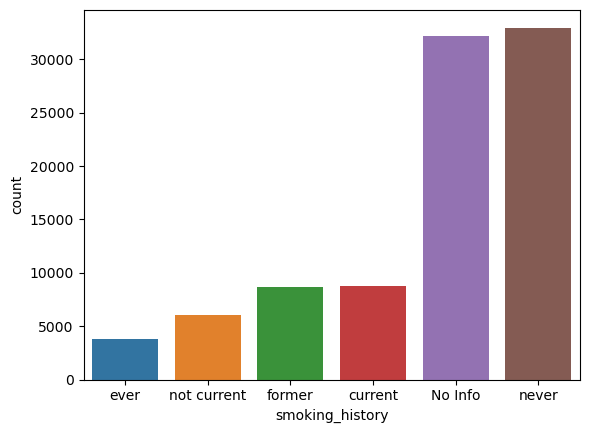

In [50]:
# Gráfico antes de tratar

contagem = dados_v3['smoking_history'].value_counts().sort_values() 
sns.countplot(data = dados_v3, x = 'smoking_history', order=contagem.index)

Status listados indentificaremos como fumante

* ever: Indivíduos que já fumaram em algum momento da vida, independente de seu status atual de tabagismo
* not current: Costumavam fumar, mas atualmente não fumam mais
* current: É fumante atualmente
* former: Costumavam fumar, mas não fumam atualmente e estão em períodos longos de abstinência (sem fumar) se comparado com o not current

In [51]:
# Criando uma nova coluna com condição usando numpy

list_smoking_status = ['ever', 'not current', 'current', 'former']
dados_v3['smoking_status'] = np.where(np.isin(dados_v3['smoking_history'], list_smoking_status), 'smoker',
    np.where(dados_v3['smoking_history'] == 'No Info', 'no-info', 'non-smoker'))

In [52]:
dados_v3.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_status
0,Female,80.0,0,1,never,25.19,6.6,140,0,non-smoker
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,no-info
2,Male,28.0,0,0,never,27.32,5.7,158,0,non-smoker
3,Female,36.0,0,0,current,23.45,5.0,155,0,smoker
4,Male,76.0,1,1,current,20.14,4.8,155,0,smoker


<Axes: xlabel='smoking_status', ylabel='count'>

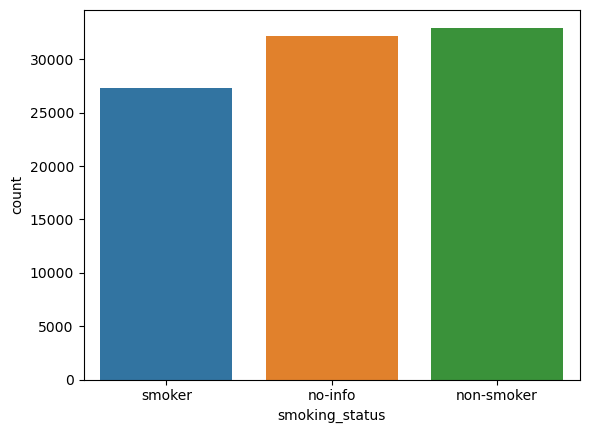

In [53]:
contagem_smoking_status = dados_v3['smoking_status'].value_counts().sort_values()
sns.countplot(data = dados_v3, x = 'smoking_status', order = contagem_smoking_status.index)

In [54]:
qtd_smoker = len(dados_v3.query('smoking_status != "non-smoker" and smoking_status != "no-info"'))
print('Quantidade de fumantes: ', qtd_smoker)

qtd_nonsmoker = len(dados_v3.query('smoking_status == "non-smoker"'))
print('Quantidade de não fumantes: ', qtd_nonsmoker)

Quantidade de fumantes:  27349
Quantidade de não fumantes:  32975


In [55]:
# Agora podemos remover a coluna 'smoker_history'

dados_v4 = dados_v3.copy()
dados_v4 = dados_v4.drop('smoking_history', axis = 1)

In [56]:
dados_v4.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_status
0,Female,80.0,0,1,25.19,6.6,140,0,non-smoker
1,Female,54.0,0,0,27.32,6.6,80,0,no-info
2,Male,28.0,0,0,27.32,5.7,158,0,non-smoker
3,Female,36.0,0,0,23.45,5.0,155,0,smoker
4,Male,76.0,1,1,20.14,4.8,155,0,smoker


In [57]:
# Excluir registros com valor 'Others' na coluna gender
dados_v4 = dados_v4.drop(dados_v4.loc[dados_v4['gender'] == 'Other'].index)

dados_v4.gender.value_counts()

gender
Female    54056
Male      38468
Name: count, dtype: int64

In [58]:
# Excluir registros com valor 'no-info' na coluna smoking_status
dados_v4 = dados_v4.drop(dados_v4.loc[dados_v4['smoking_status'] == 'no-info'].index)

dados_v4.smoking_status.value_counts()

smoking_status
non-smoker    32972
smoker        27340
Name: count, dtype: int64

### Pré-Processamento de dados

#### Dividindo os dados de treino e teste

In [59]:
dados_v5 = dados_v4.copy()
dados_v5.sample(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_status
75043,Female,27.0,0,0,28.44,5.0,126,0,non-smoker
34097,Male,80.0,0,0,27.32,3.5,159,0,smoker
19826,Male,18.0,0,0,25.25,6.2,100,0,smoker
39453,Male,63.0,0,0,24.96,6.2,126,0,smoker
8340,Female,35.0,0,0,22.05,6.5,145,0,non-smoker


In [60]:
# Variáveis independentes
x = dados_v5.drop('diabetes', axis = 1)
x.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_status
0,Female,80.0,0,1,25.19,6.6,140,non-smoker
2,Male,28.0,0,0,27.32,5.7,158,non-smoker
3,Female,36.0,0,0,23.45,5.0,155,smoker
4,Male,76.0,1,1,20.14,4.8,155,smoker
5,Female,20.0,0,0,27.32,6.6,85,non-smoker


In [61]:
# Variáveis depentes
y = dados_v5.diabetes
y.head()

0    0
2    0
3    0
4    0
5    0
Name: diabetes, dtype: int64

In [62]:
# 70% para treino e 30% para teste
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1234,
                                                    stratify = dados_v5.diabetes)

In [63]:
len(x_train)

42218

In [64]:
len(y_train)

42218

In [65]:
dados_v5.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_status
0,Female,80.0,0,1,25.19,6.6,140,0,non-smoker
2,Male,28.0,0,0,27.32,5.7,158,0,non-smoker
3,Female,36.0,0,0,23.45,5.0,155,0,smoker
4,Male,76.0,1,1,20.14,4.8,155,0,smoker
5,Female,20.0,0,0,27.32,6.6,85,0,non-smoker


In [66]:
dados_v5.smoking_status.value_counts()

smoking_status
non-smoker    32972
smoker        27340
Name: count, dtype: int64

#### Label Encoding

é  uma  técnica  de  codificação para  lidar  comvariáveis categóricas. Nesta técnica, a cada rótulo é atribuído um número inteiro exclusivo com base na ordem alfabética.

Na  codificação  de  rótulos  em  Python,  substituímos  o  valor  categórico  por  um  valor numérico entre 0 e o número de classes menos 1. Se ovalor da variável categórica contiver 5 classes distintasusamos (0, 1, 2, 3 e 4).Observe que os dados são modificados, mas sem perder a informação que eles representam.

In [67]:
# Cria o objeto
label_encoder = LabelEncoder()

In [68]:
x_train_encoder = x_train.copy()
x_test_encoder = x_test.copy()

In [69]:
# Aplica o fit nos dados de treino, apenas nas colunas categóricas
# gender e smoking_status

col_label_encoder = ['gender', 'smoking_status']
for col_le in col_label_encoder:
    x_train_encoder[col_le] = label_encoder.fit_transform(x_train[col_le])

In [70]:
# Aplica o fit nos dados de teste, apenas nas colunas categóricas
# gender e smoking_status
for col_le2 in col_label_encoder:
    x_test_encoder[col_le2] = label_encoder.fit_transform(x_test[col_le2])

In [71]:
# non-smoker = 1 pois vem em segundo em ordem alfabética
# no-info = 0 pois vem primeiro em ordem alfabetica
# smoker = 2 pois vem em terceiro em ordem alfabética

print(x_train_encoder['smoking_status'].value_counts())

print()
print(50*'-')



# Female = 0
# Male = 1

print(x_train_encoder['gender'].value_counts())

smoking_status
0    23102
1    19116
Name: count, dtype: int64

--------------------------------------------------
gender
0    25632
1    16586
Name: count, dtype: int64


In [72]:
# non-smoker = 1 pois vem em segundo em ordem alfabética
# no-info = 0 pois vem primeiro em ordem alfabetica
# smoker = 2 pois vem em terceiro em ordem alfabética

print(x_test_encoder['smoking_status'].value_counts())

print()
print(50*'-')



# Female = 0
# Male = 1
# Other = 2

print(x_test_encoder['gender'].value_counts())

smoking_status
0    9870
1    8224
Name: count, dtype: int64

--------------------------------------------------
gender
0    10834
1     7260
Name: count, dtype: int64


#### Balanceamento de classe

Vamos aplicar o SMOTE para Oversampling, a fim de aumentar a classe minoritária

In [73]:
y_train.value_counts()

diabetes
0    38877
1     3341
Name: count, dtype: int64

In [74]:
# Cria o objeto
# O k_neighbors usado para controlar o número de vizinhos mais próximos considerados durante a geração de amostras sintéticas.
# Ele determina quantos vizinhos devem ser examinados para cada amostra da classe minoritária durante o processo de oversampling.
oversampling_smote = SMOTE(k_neighbors = 2)

In [75]:
# aplicamos o fit nos dados de treino
x_train_smote, y_train_smote = oversampling_smote.fit_resample(x_train_encoder, y_train)

In [76]:
len(x_train_smote)

77754

In [77]:
len(y_train_smote)

77754

In [78]:
# Voltamos os nomes dos variáveis para x_train e y_train
x_train = x_train_smote
y_train = y_train_smote

x_test = x_test_encoder

In [79]:
len(x_train)

77754

In [80]:
len(y_train)

77754

In [81]:
y_train.value_counts()

diabetes
0    38877
1    38877
Name: count, dtype: int64

#### Padronização dos dados

A técnica de padronização é usada para centralizar as colunas de recursos na média 0 com um desvio padrão de 1 para que as colunas de recursos tenham os mesmos parâmetros de uma distribuição normal padrão. 

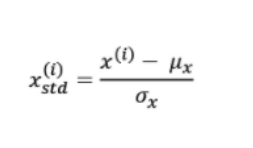

Exemplo, caso quiséssemos fazer "na unha"


train_mean = x_train.mean()

train_std = x_train.std()


x_train = (x_train - train_mean ) / train_std
x_train.head()

In [82]:
scaler = StandardScaler()

In [83]:
# dados de treinamento
x_train_scaled = scaler.fit_transform(x_train)

In [84]:
# dados de treinamento
x_test_scaled = scaler.transform(x_test_encoder)

In [85]:
x_train = x_train_scaled
x_test = x_test_scaled

### Construção e Avaliação do Modelo 1 - Regressão Logística (Benchmark)

Definição de Hiperparâmetros:

Regularização (penalidade): A regressão logística pode usar regularização L1 ou L2 para lidar com a multicolinearidade e evitar overfitting. Experimente diferentes valores de regularização e veja qual funciona melhor para o seu conjunto de dados.

Taxa de aprendizado (learning rate): A taxa de aprendizado determina o tamanho dos passos que o algoritmo de otimização dá durante o treinamento. Valores muito altos podem fazer com que o algoritmo não converja, enquanto valores muito baixos podem levar a um treinamento lento. Experimente diferentes valores, como 0,1, 0,01 ou 0,001.

In [86]:
# Define lista de hiperparâmetros
param_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [87]:
# GridSearchCV Utilizada para encontrar a combinação ótima de hiperparâmetros para um modelo de aprendizado de máquina. 
# É uma forma sistemática de busca em grade, onde você especifica um conjunto de valores possíveis para cada hiperparâmetro 
# e o GridSearchCV avalia o desempenho do modelo para todas as combinações possíveis desses valores.
model_1 = GridSearchCV(LogisticRegression(),
                       param_v1,
                       scoring = 'roc_auc',
                       n_jobs = -1)

In [88]:
# Treinamento do modelo

model_1.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [89]:
# Analisamos o melhor modelo
# Vimos que é com hiperparâmetro C=0.01

model_1.best_estimator_

LogisticRegression(C=0.01)

In [90]:
# Fazendo as previsões

y_predreglogistica = model_1.predict(x_test)

In [91]:
# analisando a saida dos 10 primeiros registros
y_predreglogistica[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [92]:
# Analisando a saida em formato de probabilidade
y_predreglogistica_proba = model_1.predict_proba(x_test)
y_predreglogistica_proba[:10]

array([[9.54946209e-01, 4.50537911e-02],
       [9.95004093e-01, 4.99590680e-03],
       [8.20912946e-01, 1.79087054e-01],
       [9.99546094e-01, 4.53905659e-04],
       [9.15211425e-01, 8.47885751e-02],
       [9.97009266e-01, 2.99073414e-03],
       [9.84627564e-01, 1.53724361e-02],
       [9.99849032e-01, 1.50967834e-04],
       [9.77725130e-01, 2.22748700e-02],
       [8.86945738e-01, 1.13054262e-01]])

In [93]:
# Matriz de Confusão

confusion_matrix(y_test, y_predreglogistica)

array([[14244,  2418],
       [  248,  1184]], dtype=int64)

In [94]:
# Calculando acurácia do modelo
accuracy_score(y_test, y_predreglogistica)

0.8526583397811429

In [95]:
# Calculando o recall do modelo
recall = recall_score(y_test, y_predreglogistica)
recall

0.8268156424581006

In [96]:
# Criando e treinndo o modelo novamente, porém com o melhor hiperparâmetro 
model_1 = LogisticRegression(C = 0.01)
model_1.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [98]:
# Fazendo previsões
y_predreglogistica = model_1.predict(x_test)
y_predreglogistica[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [99]:
# Matriz de confusão
print(confusion_matrix(y_test, y_predreglogistica))
acuracia_1 = accuracy_score(y_test, y_predreglogistica)
print(acuracia_1)

[[14244  2418]
 [  248  1184]]
0.8526583397811429


### Feature Importance model_1

In [102]:
# Obtemos os coeficientes pelo maior maior usando np.argsort
# abs pega o valor absoluto e arsort ordena o array
indices_reglogistica = np.argsort(-abs(model_1.coef_[0,:]))
indices_reglogistica

array([5, 6, 1, 4, 7, 2, 3, 0], dtype=int64)

In [103]:
# Variáveis mais importantes
print('Variáveis mais importantes do model_1: ')
print(50*'-')
for feature in x.columns[indices_reglogistica]:
    print(feature)

Variáveis mais importantes do model_1: 
--------------------------------------------------
HbA1c_level
blood_glucose_level
age
bmi
smoking_status
hypertension
heart_disease
gender


In [105]:
# Salva o modelo em disco        
with open('modelos/model_1.pkl', 'wb') as pickle_file:
    joblib.dump(model_1, 'modelos/model_1.pkl')

In [106]:
# Criando dataframe com dados do modelo

df_modelo = pd.DataFrame()

In [107]:
dict_modelo_1 = {'Nome': ['model_1'],
                 'Algoritmo': ['Regressão Logística'],
                 'Acurácia': [acuracia_1]}

df_dict = pd.DataFrame(dict_modelo_1)

In [108]:
df_modelo = pd.concat([df_modelo, df_dict], ignore_index = True)

In [109]:
df_modelo

,Nome,Algoritmo,Acurácia
0,model_1,Regressão Logística,0.852658


### Construção e Avaliação do Modelo 2 - Random Forest

Definição de hiperparâmetros:

n_estimators: O número de árvores na floresta. Um valor maior geralmente resulta em um modelo mais robusto, mas também aumenta o tempo de treinamento.

min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Especifica o número mínimo de amostras necessárias para considerar uma divisão adicional em um nó. Um valor maior evita divisões que levam a partições muito pequenas, o que pode levar a um ajuste excessivo.

min_samples_leaf: O número mínimo de amostras necessárias em uma folha. Especifica o número mínimo de amostras necessárias para formar uma folha em uma árvore. Um valor maior evita folhas com muito poucas amostras, o que também pode levar a um ajuste excessivo.

In [110]:
# Grid de hiperparâmetros
params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [111]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
model_2 = RandomizedSearchCV(RandomForestClassifier(),
                             params_v2,
                             n_iter = 15,
                             scoring = 'roc_auc',
                             n_jobs = -1)

In [105]:
# Treinamento do modelo
model_2.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [ ]:
# Fazendo previsões

y_pred_randomforest = model_2.predict(x_test)
y_pred_randomforest_proba = model_2.predict_proba(x_test)

In [107]:
y_pred_randomforest[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [108]:
y_pred_randomforest_proba[:5]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.72683333, 0.27316667],
       [1.        , 0.        ],
       [0.99      , 0.01      ]])

In [109]:
# Matriz de confusão
confusion_matrix(y_test, y_pred_randomforest)

array([[25697,   343],
       [  686,  1037]], dtype=int64)

In [110]:
# Acurácia

acuracia_randomforest = accuracy_score(y_test, y_pred_randomforest)
acuracia_randomforest

0.9629362821020783

In [111]:
# Salvando o modelo 2 em disco
# Salva o modelo em disco        
with open('modelos/model_2.pkl', 'wb') as pickle_file:
    joblib.dump(model_2, 'modelos/model_2.pkl')

In [112]:
# Alimentando o dataframe para escolhermos os melhores modelos

dict_randomforest = {'Nome': ['model_2'],
                     'Algoritmo': ['Random Forest'],
                     'Acurácia': [acuracia_randomforest]}

In [113]:
df_dict_randomforest = pd.DataFrame(dict_randomforest)

In [114]:
df_modelo = pd.concat([df_modelo,df_dict_randomforest], ignore_index = True)
df_modelo

,Nome,Algoritmo,Acurácia
0,model_1,Regressão Logística,0.856608
1,model_2,Random Forest,0.962936


### Construção e Avaliação do Modelo 3 - Decision Tree


In [113]:
# Hiperparâmetros
params_v3 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [114]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
model_3 = RandomizedSearchCV(DecisionTreeClassifier(),
                             params_v3,
                             n_iter = 15,
                             scoring = 'roc_auc',
                             n_jobs = -1)

In [115]:
# Treinando modelo 3
model_3.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [116]:
# Melhores hiperparâmetros

model_3.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=4)

In [117]:
# Recriando o modelo com os melhores hiperparâmetros encontrados

model_3 = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 3, min_samples_split = 5)
model_3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)

In [118]:
# Fazendo previsões
y_pred_decisiontree = model_3.predict(x_test)
y_pred_decisiontree[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [119]:
# Previsões em probabilidade
y_pred_decisiontree_proba = model_3.predict_proba(x_test)
y_pred_decisiontree_proba[:10]

array([[0.99447077, 0.00552923],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.36712465, 0.63287535],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.92368839, 0.07631161],
       [1.        , 0.        ]])

In [120]:
# Matrx de confusão

confusion_matrix(y_test, y_pred_decisiontree)

array([[14052,  2610],
       [  204,  1228]], dtype=int64)

In [121]:
# Acurácia
acuracia_decisiontree = accuracy_score(y_test, y_pred_decisiontree)
acuracia_decisiontree

0.8444788327622417

[Text(0.5294117647058824, 0.9375, 'HbA1c_level <= -0.275\ngini = 0.5\nsamples = 77754\nvalue = [38877, 38877]'),
 Text(0.2647058823529412, 0.8125, 'blood_glucose_level <= 1.266\ngini = 0.068\nsamples = 20044\nvalue = [19337, 707]'),
 Text(0.23529411764705882, 0.6875, 'HbA1c_level <= -0.626\ngini = 0.055\nsamples = 19905\nvalue = [19337, 568]'),
 Text(0.20588235294117646, 0.5625, 'gini = 0.0\nsamples = 16068\nvalue = [16068, 0]'),
 Text(0.2647058823529412, 0.5625, 'age <= 0.425\ngini = 0.252\nsamples = 3837\nvalue = [3269, 568]'),
 Text(0.14705882352941177, 0.4375, 'hypertension <= -0.452\ngini = 0.12\nsamples = 2746\nvalue = [2570, 176]'),
 Text(0.08823529411764706, 0.3125, 'bmi <= 2.859\ngini = 0.085\nsamples = 2533\nvalue = [2421, 112]'),
 Text(0.058823529411764705, 0.1875, 'age <= -0.768\ngini = 0.078\nsamples = 2524\nvalue = [2421, 103]'),
 Text(0.029411764705882353, 0.0625, 'gini = 0.011\nsamples = 1266\nvalue = [1259, 7]'),
 Text(0.08823529411764706, 0.0625, 'gini = 0.141\nsample

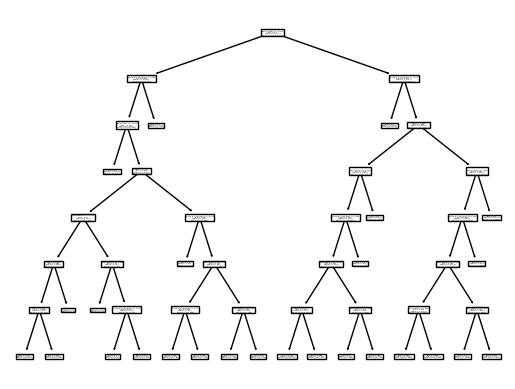

In [122]:
tree.plot_tree(model_3, feature_names = x.columns)

#### Feature Importance Model_3

In [123]:
# Variáveis mais importantes
indices_decisiontree = np.argsort(-model_3.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in x.columns[indices_decisiontree]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
HbA1c_level
blood_glucose_level
age
hypertension
bmi
gender
heart_disease
smoking_status


In [124]:
# Criando dicionario com resultado

df_dict_decisiontree = {'Nome': ['Model_3'],
                        'Algoritmo': ['Decision Tree'],
                        'Acurácia': [acuracia_decisiontree] 
                       }

df_decisiontree = pd.DataFrame(df_dict_decisiontree)

In [125]:
df_modelo = pd.concat([df_modelo, df_decisiontree], ignore_index = True)
df_modelo

,Nome,Algoritmo,Acurácia
0,model_1,Regressão Logística,0.852658
1,Model_3,Decision Tree,0.844479


In [126]:
# Salvando modelo 3

with open('modelos/model_3.pkl', 'wb') as pickle_file:
    joblib.dump(model_3, 'modelos/model_3.pkl')

### Selecionado o melhor modelo e preparando para previsões com novos dados de entrada

In [127]:
melhor_modelo = df_modelo[df_modelo['Acurácia'] == df_modelo['Acurácia'].max()]

melhor_modelo

,Nome,Algoritmo,Acurácia
0,model_1,Regressão Logística,0.852658


In [128]:
# Carregando o melhor modelo

nome_melhor_modelo = melhor_modelo.Nome.to_string(index = False)
nome_melhor_modelo

'model_1'

In [129]:
# Carregando melhor modelo em disco
# Como esta em disco posso fazer isso com um novo script para ficar mais organizado

melhor_modelo = joblib.load('modelos/' + nome_melhor_modelo + '.pkl')

melhor_modelo

LogisticRegression(C=0.01)

In [130]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'smoking_status'],
      dtype='object')

In [131]:
# Entrando com dados de novo paciente
novo_paciente = [1, 54, 0, 0, 27.32, 6.6, 80, 0]

In [132]:
novo_paciente_df = pd.DataFrame([novo_paciente], columns = x.columns)

novo_paciente_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_status
0,1,54,0,0,27.32,6.6,80,0


In [133]:


padr = scaler.transform(novo_paciente_df)
padr

array([[ 1.38008278,  0.04927074, -0.47492194, -0.33603532, -0.35284277,
         0.62777695, -1.65920989, -0.80300776]])

In [134]:
pred_novo_pac_prob = melhor_modelo.predict_proba(padr)
pred_novo_pac_prob

array([[0.78656535, 0.21343465]])

In [135]:
pred_novo_pac = melhor_modelo.predict(padr)
pred_novo_pac

array([0], dtype=int64)

In [136]:
if pred_novo_pac == 1:
    print('Com risco de diabetes: ', pred_novo_pac_prob[0][1])
else:
    print('Sem risco de diabetes: ', pred_novo_pac_prob[0][1])

Sem risco de diabetes:  0.21343464709691737


### Fazendo novas previsões com minha base x

In [137]:
novos_dados = pd.DataFrame(x)
novos_dados.head(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_status
0,Female,80.0,0,1,25.19,6.6,140,non-smoker
2,Male,28.0,0,0,27.32,5.7,158,non-smoker
3,Female,36.0,0,0,23.45,5.0,155,smoker
4,Male,76.0,1,1,20.14,4.8,155,smoker
5,Female,20.0,0,0,27.32,6.6,85,non-smoker


In [138]:
# Aplica o fit nos dados, apenas nas colunas categóricas
# gender e smoking_status

col_label_encoder_novos_dados = ['gender', 'smoking_status']
for col_le in col_label_encoder_novos_dados:
    novos_dados[col_le] = label_encoder.fit_transform(novos_dados[col_le])

In [139]:
novos_dados.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_status
0,0,80.0,0,1,25.19,6.6,140,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,1
4,1,76.0,1,1,20.14,4.8,155,1
5,0,20.0,0,0,27.32,6.6,85,0


In [140]:
# Padronizando os dados

novos_dados_padr = scaler.transform(novos_dados)
novos_dados_padr = pd.DataFrame(novos_dados_padr)

# atribuindo as colunas
novos_dados_padr.columns = x.columns

novos_dados_padr.head(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_status
0,-0.724594,1.419903,-0.474922,3.637339,-0.696239,0.627777,-0.309218,-0.803008
1,1.380083,-1.321362,-0.474922,-0.336035,-0.352843,-0.274587,0.095780,-0.803008
2,-0.724594,-0.899629,-0.474922,-0.336035,-0.976759,-0.976425,0.028280,1.245318
3,1.380083,1.209037,2.515463,3.637339,-1.510393,-1.176950,0.028280,1.245318
4,-0.724594,-1.743095,-0.474922,-0.336035,-0.352843,0.627777,-1.546711,-0.803008


In [141]:
pred_novos_dados_padr_proba = melhor_modelo.predict_proba(novos_dados_padr)
pred_novos_dados_padr_proba

array([[5.85210912e-02, 9.41478909e-01],
       [9.19801303e-01, 8.01986973e-02],
       [9.88409769e-01, 1.15902306e-02],
       ...,
       [7.73747539e-01, 2.26252461e-01],
       [9.99224797e-01, 7.75202685e-04],
       [8.36056935e-01, 1.63943065e-01]])

In [142]:
pred_novos_dados_padr = melhor_modelo.predict(novos_dados_padr)
pred_novos_dados_padr

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
confusion_matrix(y, pred_novos_dados_padr)

array([[47437,  8102],
       [  787,  3986]], dtype=int64)

In [144]:
accuracy_score(y, pred_novos_dados_padr)

0.852616394747314

### Gerando novo dataframe

In [145]:
len(novos_dados)

60312

In [146]:
len(pred_novos_dados_padr_proba)

60312

In [147]:
type(novos_dados)

pandas.core.frame.DataFrame

In [148]:
type(pred_novos_dados_padr_proba)

numpy.ndarray

In [149]:
df_final_pred_novos_dados = pd.DataFrame(pred_novos_dados_padr_proba)
df_final_pred_novos_dados.head()

,0,1
0,0.058521,0.941479
1,0.919801,0.080199
2,0.988410,0.011590
3,0.871204,0.128796
4,0.922628,0.077372


In [150]:
# Pegaremos aqui a coluna de indice 1 que é nossa probabilidade de ter diabetes
df_final_pred_novos_dados = pd.DataFrame(df_final_pred_novos_dados[1])

In [151]:
df_final_pred_novos_dados.columns = ['Probabilidade']

df_final_pred_novos_dados.head()

,Probabilidade
0,0.941479
1,0.080199
2,0.011590
3,0.128796
4,0.077372


In [152]:
# concateno meu novos_dados com df_final_pred_novos_dados

df_final_pred_novos_dados = df_final_pred_novos_dados.reset_index(drop = True)
novos_dados = novos_dados.reset_index(drop = True)

final_df = pd.concat([novos_dados, df_final_pred_novos_dados], axis = 1)

final_df.columns = ['gender', 'age', 'hypertension', 'heart_disease',
                    'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_status', 'Probabilidade']

final_df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_status,Probabilidade
0,0,80.0,0,1,25.19,6.6,140,0,0.941479
1,1,28.0,0,0,27.32,5.7,158,0,0.080199
2,0,36.0,0,0,23.45,5.0,155,1,0.011590
3,1,76.0,1,1,20.14,4.8,155,1,0.128796
4,0,20.0,0,0,27.32,6.6,85,0,0.077372


In [153]:
novos_dados.shape

(60312, 8)

In [154]:
df_final_pred_novos_dados.shape

(60312, 1)

In [155]:
# Condição para atribuirmos os nomes nas variaveis categoricas

# gender

final_df['gender'] = np.where(final_df['gender'] == 0, 'Female', 'Male')

final_df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_status,Probabilidade
0,Female,80.0,0,1,25.19,6.6,140,0,0.941479
1,Male,28.0,0,0,27.32,5.7,158,0,0.080199
2,Female,36.0,0,0,23.45,5.0,155,1,0.011590
3,Male,76.0,1,1,20.14,4.8,155,1,0.128796
4,Female,20.0,0,0,27.32,6.6,85,0,0.077372


In [156]:
final_df.gender.value_counts()

gender
Female    36466
Male      23846
Name: count, dtype: int64

In [157]:
# Condição para atribuirmos os nomes nas variaveis categoricas

# smoking_status
# non-smoker = 1 pois vem em segundo em ordem alfabética
# no-info = 0 pois vem primeiro em ordem alfabetica
# smoker = 2 pois vem em terceiro em ordem alfabética

final_df['smoking_status'] = np.where(final_df['smoking_status'] == 0, 'non-smoker','smoker')

final_df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_status,Probabilidade
0,Female,80.0,0,1,25.19,6.6,140,non-smoker,0.941479
1,Male,28.0,0,0,27.32,5.7,158,non-smoker,0.080199
2,Female,36.0,0,0,23.45,5.0,155,smoker,0.011590
3,Male,76.0,1,1,20.14,4.8,155,smoker,0.128796
4,Female,20.0,0,0,27.32,6.6,85,non-smoker,0.077372


In [158]:
final_df.smoking_status.value_counts()

smoking_status
non-smoker    32972
smoker        27340
Name: count, dtype: int64

In [159]:
len(novos_dados)

60312

In [160]:
len(df_final_pred_novos_dados)

60312

In [161]:
final_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
smoking_status         0
Probabilidade          0
dtype: int64

### Salvando o dataframe em csv

In [162]:
caminho = 'csv_gerado/final_df.csv'

final_df.to_csv(caminho, index=False)

### Inserindo dados no banco de dados MySQL

In [163]:
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError


In [164]:
host = 'localhost'
database = 'portfolio'
username = 'root'
password = ''

In [165]:
url = f'mysql+pymysql://{username}:{password}@{host}/{database}'

In [166]:
try:
    # cria a engine, conexão com o banco de dados
    engine = create_engine(url)
    
    # insere os dados do datraframe no banco de dados, na tabela tbDiabetes
    # Caso os valores existam irei apagar e inseirr novamente ( replace )
    final_df.to_sql(name = 'tbdiabetes', con = engine, if_exists = 'replace', index = False)
    
except SQLAlchemyError as e:
    print("Erro ao conectar-se ou interagir com o banco de dados:", e)

### Inserindo as var importance no banco de dados

In [167]:
df_var_importance = []

# Variáveis mais importantes
print('Variáveis mais importantes do model_1 (Regressão Logistica): ')
print(50*'-')
for feature in x.columns[indices_reglogistica]:
    print(feature)
    df_var_importance.append(feature)

Variáveis mais importantes do model_1 (Regressão Logistica): 
--------------------------------------------------
HbA1c_level
blood_glucose_level
age
bmi
smoking_status
hypertension
heart_disease
gender


In [168]:
df_var_importance = pd.DataFrame(df_var_importance)

# aqui já está em ordem de 'prioridade', porém vamos adicionar uma coluna definindo a ordem
df_var_importance['Ordem'] = range(1,9)

df_var_importance.columns = ['Var Importance', 'Ordem']

df_var_importance

,Var Importance,Ordem
0,HbA1c_level,1
1,blood_glucose_level,2
2,age,3
3,bmi,4
4,smoking_status,5
5,hypertension,6
6,heart_disease,7
7,gender,8


In [169]:
try:
    # cria a engine, conexão com o banco de dados
    engine = create_engine(url)
    
    # insere os dados do datraframe no banco de dados, na tabela tbDiabetes
    # Caso os valores existam irei apagar e inserir novamente ( replace )
    df_var_importance.to_sql(name = 'tbvarimportance', con = engine, if_exists = 'replace', index = False)
    
except SQLAlchemyError as e:
    print("Erro ao conectar-se ou interagir com o banco de dados:", e)